pages/day = 1.25
pages/week = 8.72
pages/month = 37.35


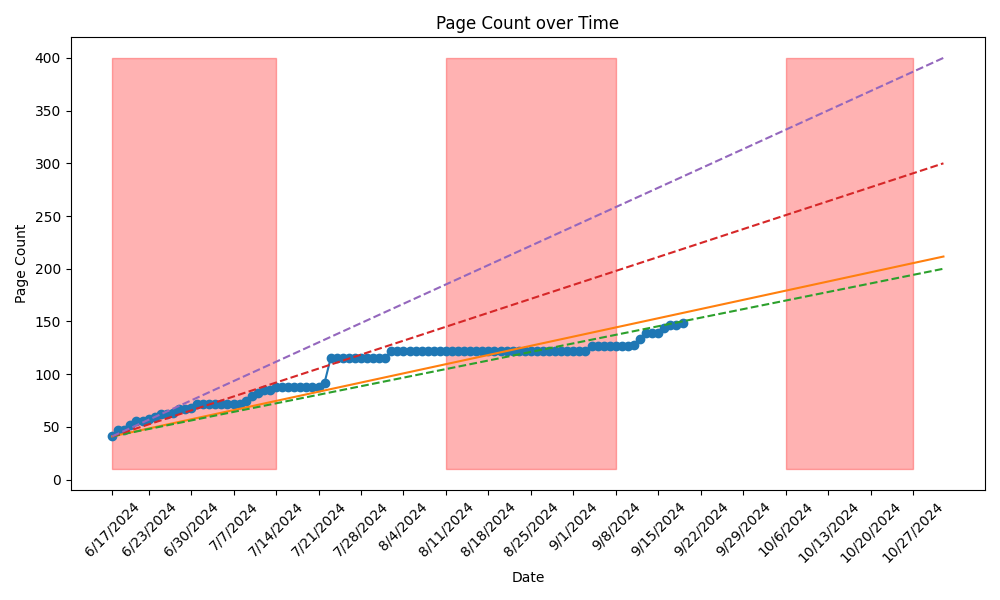

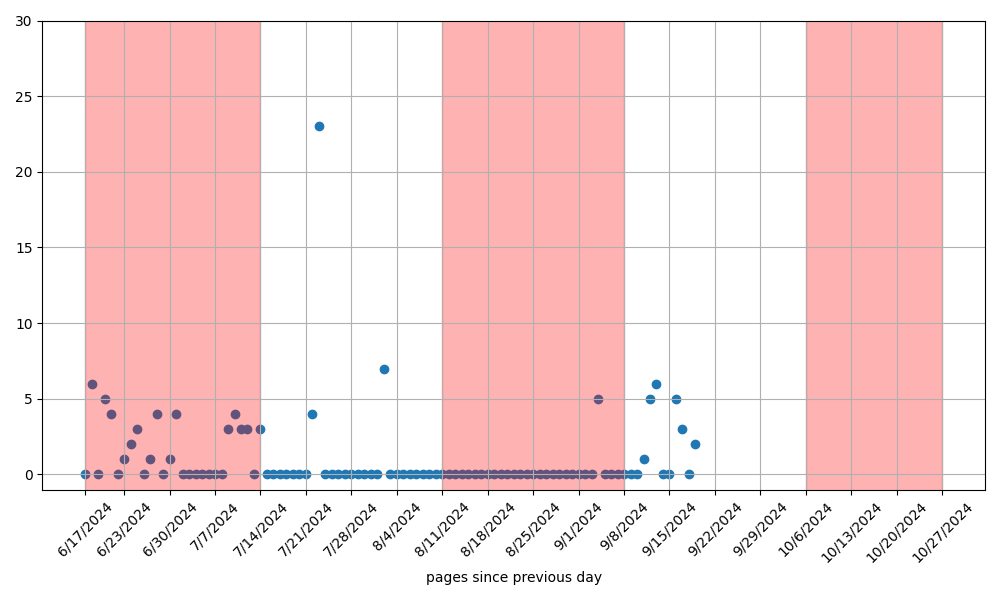

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib widget
# Load the .ods file
file_path = 'pageCountSheet.ods'  # replace with your file path
data = pd.read_excel(file_path, engine='odf')

# Replace blank cells with NaN
data = data.replace('', np.nan)

# Extract columns into lists
idx_list = data['idx'].to_numpy()
date_list = data['date'].to_numpy()
pageCount_list = data['pageCount'].to_numpy()

currentDateIdx = np.where(pd.isna(pageCount_list))[0][0]


# Fit line and calculate pages per day using numpy.polyfit
slope, intercept = np.polyfit(idx_list[:currentDateIdx], pageCount_list[:currentDateIdx], 1)

#fix the intercept at 41 to prevent weird curve fit behavor
slopeNoInt, _ = scipy.optimize.curve_fit(lambda x, m: m*x+41, idx_list[:currentDateIdx], pageCount_list[:currentDateIdx])

print(f'pages/day = {round(slopeNoInt[0],2)}')
print(f'pages/week = {round(7*slopeNoInt[0],2)}')
print(f'pages/month = {round(30*slopeNoInt[0],2)}')

plt.close('all')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(date_list, pageCount_list, marker='o')
#plt.plot(date_list, slope*idx_list + intercept, label = f'best fit. {round(slope, 2)} pg/day' )
plt.plot(date_list, slopeNoInt*idx_list + 41, label = f'Best fit (w/o intercept) {round(slopeNoInt[0], 2)} pg/day' )
plt.plot([date_list[0], '11/1/2024'], [41, 200], linestyle = '--',label='200 pages 11/1')
plt.plot([date_list[0], '11/1/2024'], [41, 300], linestyle = '--',label='300 pages 11/1')
plt.plot([date_list[0], '11/1/2024'], [41, 400],linestyle = '--', label='400 pages 11/1')
# Limit the number of x-ticks
num_ticks = 10
if len(date_list) > num_ticks:
    step = len(date_list) // num_ticks
    plt.xticks(np.append(date_list[::step], date_list[-1]), rotation=45)

ticks = ['6/17/2024','6/23/2024', '6/30/2024', '7/7/2024', '7/14/2024',
 '7/21/2024', '7/28/2024', '8/4/2024', '8/11/2024',
 '8/18/2024', '8/25/2024', '9/1/2024', '9/8/2024',
 '9/15/2024', '9/22/2024', '9/29/2024', '10/6/2024',
 '10/13/2024', '10/20/2024', '10/27/2024']
plt.xticks(ticks)

plt.fill_betweenx([10, 400], '6/17/2024', '7/14/2024', color='red', alpha=0.3)
plt.fill_betweenx([10, 400], '8/11/2024', '9/8/2024', color='red', alpha=0.3)
plt.fill_betweenx([10, 400], '10/6/2024', '10/27/2024', color='red', alpha=0.3)



plt.xlabel('Date')
plt.ylabel('Page Count')
plt.title('Page Count over Time')
plt.tight_layout()
plt.show()
plt.legend(fontsize = 12)
plt.grid()
plt.ylim(30,400)

plt.figure(figsize=(10, 6))
plt.scatter(date_list, np.append(0,np.diff(pageCount_list)))
plt.grid()
plt.xticks(ticks, rotation = 45);
plt.xlabel('pages since previous day')
plt.fill_betweenx([-10, 400], '6/17/2024', '7/14/2024', color='red', alpha=0.3)
plt.fill_betweenx([-10, 400], '8/11/2024', '9/8/2024', color='red', alpha=0.3)
plt.fill_betweenx([-10, 400], '10/6/2024', '10/27/2024', color='red', alpha=0.3)
plt.ylim(-1, 30)
plt.tight_layout()


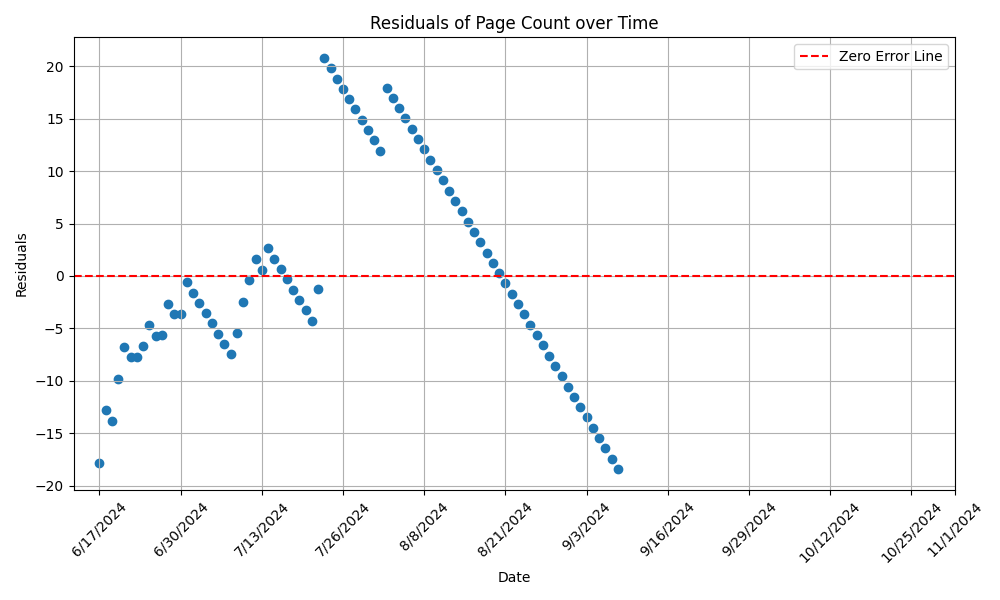

In [ ]:
# Plotting residuals
plt.figure(figsize=(10, 6))

# Calculate residuals
residuals = pageCount_list - (slope * idx_list + intercept)

# Plot residuals
plt.scatter(date_list, residuals, marker='o')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')

# Limit the number of x-ticks
num_ticks = 10
if len(date_list) > num_ticks:
    step = len(date_list) // num_ticks
    plt.xticks(np.append(date_list[::step], date_list[-1]), rotation=45)

plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of Page Count over Time')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()